# Task 9.1. Edge detection
---
***Author: Piotr Skalski***

## 1. Imports

In [66]:
import numpy as np
import cv2
import os
import pprint
from tqdm import tqdm

from skimage.transform import (hough_line, hough_line_peaks,
                               probabilistic_hough_line)
from skimage.feature import canny
from skimage import data

import display_util

import matplotlib.pyplot as plt
%matplotlib inline

## 2. Primary settings

In [2]:
SOURCE_DIR = "./../data/"
IMAGE_NAME = "dom.png"

## 3. Loading images

In [3]:
# building path to file
image_path = os.path.join(SOURCE_DIR, IMAGE_NAME)
# loading files
image = cv2.imread(image_path, 0)

### 3.1 Data overview

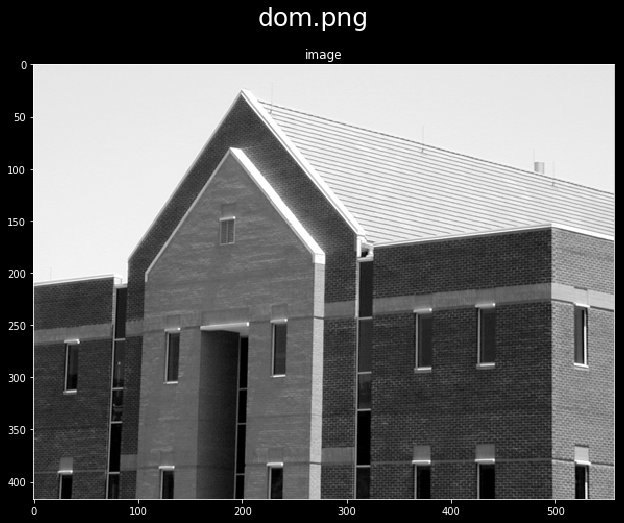

In [4]:
display_util.image(image, IMAGE_NAME, size=(12,8))

## 4. LoG

### 4.1. Local settings

In [22]:
IMAGE = np.copy(image)
KERNEL_SHAPE = (5, 5)
DDEPTH = cv2.CV_16S
KERNEL_SIZE = 5

### 4.2. Use of the built-in methods GaussianBlur and Laplacian

In [25]:
image_tmp = cv2.GaussianBlur(IMAGE, KERNEL_SHAPE, 0)
image_log = cv2.Laplacian(image_tmp, DDEPTH, KERNEL_SIZE)
ret, image_log = cv2.threshold(image_log, 10, 255, cv2.THRESH_BINARY)
image_log = cv2.convertScaleAbs(image_log)

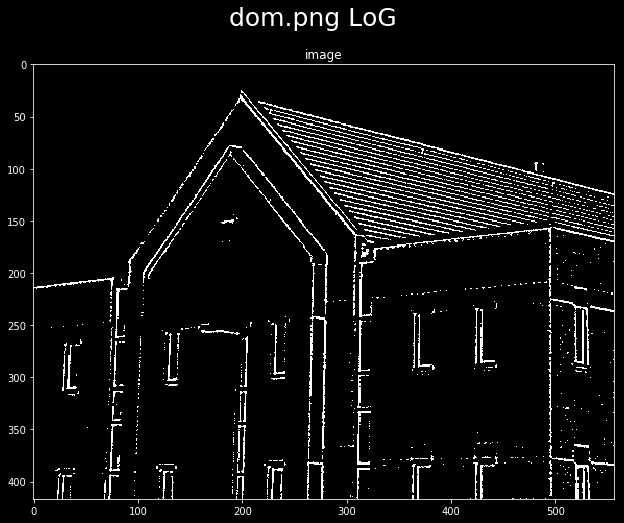

In [26]:
display_util.image(image_log, IMAGE_NAME + " LoG", size=(12,8))

## 5. Canny

### 5.1. Local settings

In [27]:
IMAGE = np.copy(image)
G_X = 100
G_Y = 200

### 5.2. Use of the built-in methods Canny

In [28]:
image_canny = cv2.Canny(IMAGE, G_X, G_Y)

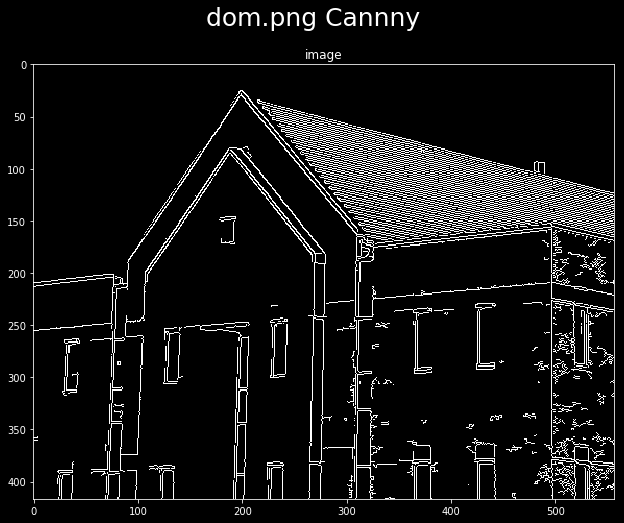

In [29]:
display_util.image(image_canny, IMAGE_NAME + " Cannny", size=(12,8))

## 6. Hough Line Transform

### 6.1. Local settings

In [82]:
IMAGE_SHAPE = (11, 11)
IMAGE = np.zeros(IMAGE_SHAPE).astype('uint8')
IMAGE[5, 7] = 1

### 6.2. Using scikit-image to display hough space

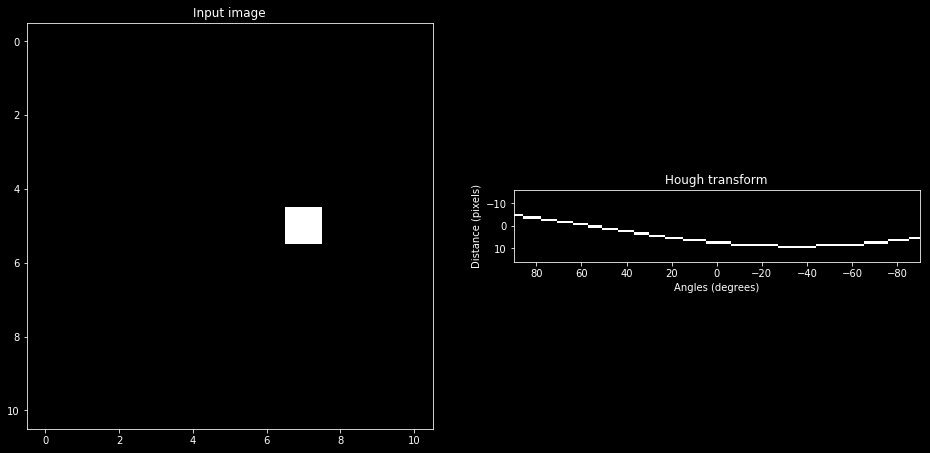

In [83]:
image = IMAGE
h, theta, d = hough_line(image)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]], cmap=cm.gray)

ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')
plt.show()

### 6.3. Add next white point to image

In [84]:
IMAGE[3, 2] = 1

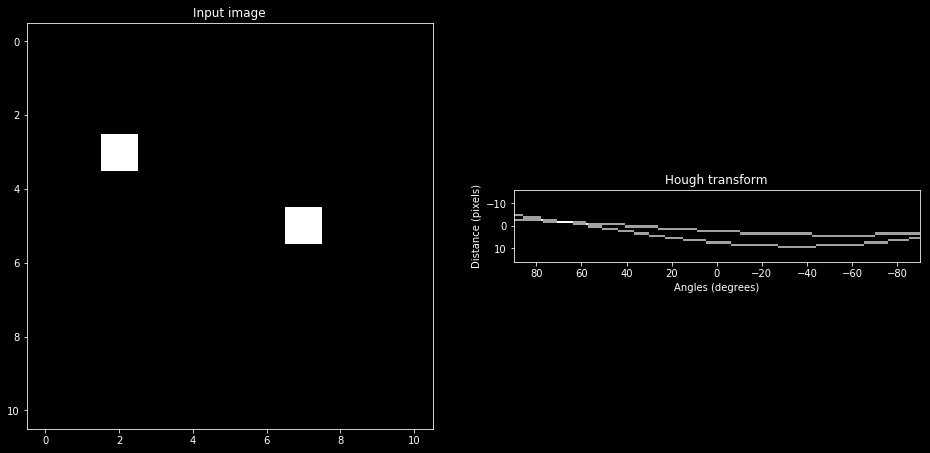

In [85]:
image = IMAGE
h, theta, d = hough_line(image)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]], cmap=cm.gray)

ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')
plt.show()

### 6.4. Add next two white points to image

In [86]:
IMAGE[9, 1] = 1
IMAGE[3, 9] = 1

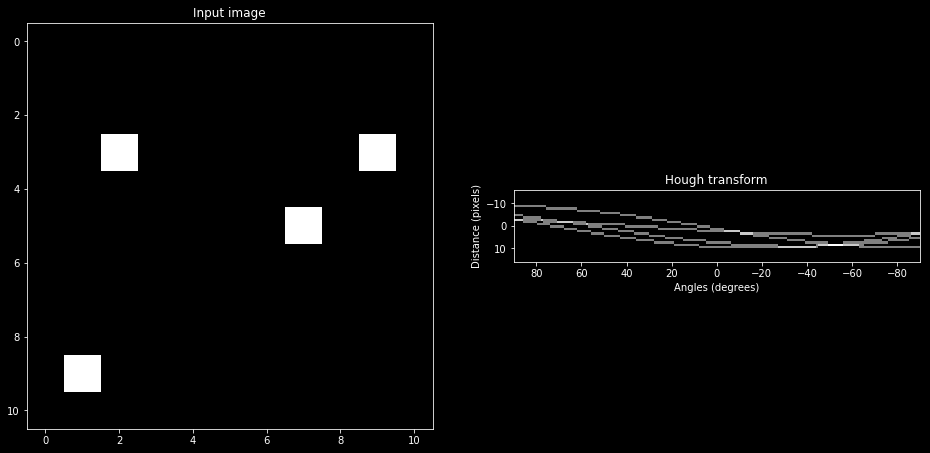

In [87]:
image = IMAGE
h, theta, d = hough_line(image)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
ax = axes.ravel()

ax[0].imshow(image, cmap=cm.gray)
ax[0].set_title('Input image')

ax[1].imshow(np.log(1 + h), extent=[np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]], cmap=cm.gray)

ax[1].set_title('Hough transform')
ax[1].set_xlabel('Angles (degrees)')
ax[1].set_ylabel('Distance (pixels)')
ax[1].axis('image')
plt.show()